In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
pwd

'D:\\KIMJIHYEOK2\\machine_learning'

In [50]:
df = pd.read_csv('./data/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

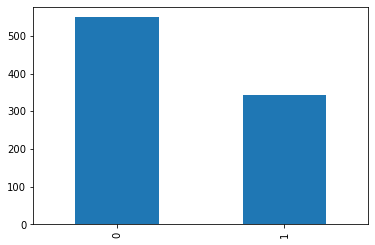

In [53]:
df.Survived.value_counts().plot(kind='bar')

In [54]:
# sns.countplot(x = df['Survived'], hue='Sex', data=df)

In [55]:
# sns.distplot(df['Age'], bins=30)

In [56]:
# sns.lmplot(x='Age', y='Survived', data=df, hue='Sex')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
# 모델을 학습 시 nan값을 처리..

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
df.drop('Cabin', axis=1, inplace=True)

In [74]:
# 'Pclass'의 평균나이로 'Age' 칼럼의 nan값을 채운다

In [75]:
# 1

In [10]:
pc_age_mean = df.groupby('Pclass')['Age'].mean()
pc_age_mean

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [12]:
age_list = []

for i, j in zip(df['Pclass'], df['Age']):
    if pd.isnull(j):
        if i == 1:
            age_list.append(38)
        elif i == 2:
            age_list.append(29)
        else:
            age_list.append(25)
    else:
        age_list.append(j)

age_list

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 25,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 29,
 31.0,
 25,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 25,
 19.0,
 25,
 25,
 40.0,
 38,
 25,
 66.0,
 28.0,
 42.0,
 25,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 25,
 3.0,
 19.0,
 25,
 25,
 25,
 25,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 38,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 38,
 25,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 25,
 25,
 0.83,
 30.0,
 22.0,
 29.0,
 25,
 28.0,
 17.0,
 33.0,
 16.0,
 25,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 25,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 25,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 25,
 38.0,
 25,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 25,
 32.5,
 32.5,
 54.0,
 12.0,
 25,
 24.0,
 25,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 25,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51.0,
 22.0,
 55.

In [13]:
for i, j in zip(age_list, df['Age']):
    print(i, j)

22.0 22.0
38.0 38.0
26.0 26.0
35.0 35.0
35.0 35.0
25 nan
54.0 54.0
2.0 2.0
27.0 27.0
14.0 14.0
4.0 4.0
58.0 58.0
20.0 20.0
39.0 39.0
14.0 14.0
55.0 55.0
2.0 2.0
29 nan
31.0 31.0
25 nan
35.0 35.0
34.0 34.0
15.0 15.0
28.0 28.0
8.0 8.0
38.0 38.0
25 nan
19.0 19.0
25 nan
25 nan
40.0 40.0
38 nan
25 nan
66.0 66.0
28.0 28.0
42.0 42.0
25 nan
21.0 21.0
18.0 18.0
14.0 14.0
40.0 40.0
27.0 27.0
25 nan
3.0 3.0
19.0 19.0
25 nan
25 nan
25 nan
25 nan
18.0 18.0
7.0 7.0
21.0 21.0
49.0 49.0
29.0 29.0
65.0 65.0
38 nan
21.0 21.0
28.5 28.5
5.0 5.0
11.0 11.0
22.0 22.0
38.0 38.0
45.0 45.0
4.0 4.0
38 nan
25 nan
29.0 29.0
19.0 19.0
17.0 17.0
26.0 26.0
32.0 32.0
16.0 16.0
21.0 21.0
26.0 26.0
32.0 32.0
25.0 25.0
25 nan
25 nan
0.83 0.83
30.0 30.0
22.0 22.0
29.0 29.0
25 nan
28.0 28.0
17.0 17.0
33.0 33.0
16.0 16.0
25 nan
23.0 23.0
24.0 24.0
29.0 29.0
20.0 20.0
46.0 46.0
26.0 26.0
59.0 59.0
25 nan
71.0 71.0
23.0 23.0
34.0 34.0
34.0 34.0
28.0 28.0
25 nan
21.0 21.0
33.0 33.0
37.0 37.0
28.0 28.0
21.0 21.0
25 nan
38.0 38.

In [79]:
# df['Age'] = age_list

In [80]:
# 2

In [14]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [15]:
age_list_gr = df.groupby('Pclass').Age.transform(fill_na_mean)

In [16]:
for i, j, z in zip(df['Age'], age_list, age_list_gr):
    print(i, j, round(z, 1))

22.0 22.0 22.0
38.0 38.0 38.0
26.0 26.0 26.0
35.0 35.0 35.0
35.0 35.0 35.0
nan 25 25.1
54.0 54.0 54.0
2.0 2.0 2.0
27.0 27.0 27.0
14.0 14.0 14.0
4.0 4.0 4.0
58.0 58.0 58.0
20.0 20.0 20.0
39.0 39.0 39.0
14.0 14.0 14.0
55.0 55.0 55.0
2.0 2.0 2.0
nan 29 29.9
31.0 31.0 31.0
nan 25 25.1
35.0 35.0 35.0
34.0 34.0 34.0
15.0 15.0 15.0
28.0 28.0 28.0
8.0 8.0 8.0
38.0 38.0 38.0
nan 25 25.1
19.0 19.0 19.0
nan 25 25.1
nan 25 25.1
40.0 40.0 40.0
nan 38 38.2
nan 25 25.1
66.0 66.0 66.0
28.0 28.0 28.0
42.0 42.0 42.0
nan 25 25.1
21.0 21.0 21.0
18.0 18.0 18.0
14.0 14.0 14.0
40.0 40.0 40.0
27.0 27.0 27.0
nan 25 25.1
3.0 3.0 3.0
19.0 19.0 19.0
nan 25 25.1
nan 25 25.1
nan 25 25.1
nan 25 25.1
18.0 18.0 18.0
7.0 7.0 7.0
21.0 21.0 21.0
49.0 49.0 49.0
29.0 29.0 29.0
65.0 65.0 65.0
nan 38 38.2
21.0 21.0 21.0
28.5 28.5 28.5
5.0 5.0 5.0
11.0 11.0 11.0
22.0 22.0 22.0
38.0 38.0 38.0
45.0 45.0 45.0
4.0 4.0 4.0
nan 38 38.2
nan 25 25.1
29.0 29.0 29.0
19.0 19.0 19.0
17.0 17.0 17.0
26.0 26.0 26.0
32.0 32.0 32.0
16.0 16.0 

48.0 48.0 48.0
nan 25 25.1
24.0 24.0 24.0
42.0 42.0 42.0
27.0 27.0 27.0
31.0 31.0 31.0
nan 25 25.1
4.0 4.0 4.0
26.0 26.0 26.0
47.0 47.0 47.0
33.0 33.0 33.0
47.0 47.0 47.0
28.0 28.0 28.0
15.0 15.0 15.0
20.0 20.0 20.0
19.0 19.0 19.0
nan 25 25.1
56.0 56.0 56.0
25.0 25.0 25.0
33.0 33.0 33.0
22.0 22.0 22.0
28.0 28.0 28.0
25.0 25.0 25.0
39.0 39.0 39.0
27.0 27.0 27.0
19.0 19.0 19.0
nan 25 25.1
26.0 26.0 26.0
32.0 32.0 32.0


In [17]:
df['Age'] = age_list

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [26]:
y = df['Survived']

In [27]:
x = df.drop(['Survived', 'Name', 'Ticket'], axis=1)

In [28]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,female,38.0,1,0,71.2833,C85,C
3,4,1,female,35.0,1,0,53.1000,C123,S
6,7,1,male,54.0,0,0,51.8625,E46,S
10,11,3,female,4.0,1,1,16.7000,G6,S
11,12,1,female,58.0,0,0,26.5500,C103,S


In [29]:
x.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [30]:
# 문자열 칼럼은 학습에 넣을 수 없다..
# 문자열 칼럼 => numeric

In [31]:
x.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked
1,2,1,female,38.0,71.2833,C85,C
3,4,1,female,35.0,53.1000,C123,S
6,7,1,male,54.0,51.8625,E46,S
10,11,3,female,4.0,16.7000,G6,S
11,12,1,female,58.0,26.5500,C103,S


In [96]:
x = pd.get_dummies(x)   # get_dummies() : 문자열 칼럼을 one-hot방식으로 변형
x

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,0,1,0,0,1
1,2,1,38.0,71.2833,1,0,1,0,0
2,3,3,26.0,7.9250,1,0,0,0,1
3,4,1,35.0,53.1000,1,0,0,0,1
4,5,3,35.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,13.0000,0,1,0,0,1
887,888,1,19.0,30.0000,1,0,0,0,1
888,889,3,25.0,23.4500,1,0,0,0,1
889,890,1,26.0,30.0000,0,1,1,0,0


In [32]:
x.drop('PassengerId', axis=1, inplace=True)

In [33]:
x

,Pclass,Sex,Age,Fare,Cabin,Embarked
1,1,female,38.0,71.2833,C85,C
3,1,female,35.0,53.1000,C123,S
6,1,male,54.0,51.8625,E46,S
10,3,female,4.0,16.7000,G6,S
11,1,female,58.0,26.5500,C103,S
...,...,...,...,...,...,...
871,1,female,47.0,52.5542,D35,S
872,1,male,33.0,5.0000,B51 B53 B55,S
879,1,female,56.0,83.1583,C50,C
887,1,female,19.0,30.0000,B42,S


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

438    0
351    0
275    1
772    0
724    1
55     1
370    1
205    0
311    1
460    1
309    1
268    1
516    1
871    1
498    0
585    1
124    0
717    1
185    0
690    1
853    1
366    1
52     1
515    0
251    0
257    1
492    0
789    0
505    0
671    0
577    1
710    1
327    1
815    0
632    1
136    1
291    1
759    1
630    1
284    0
1      1
Name: Survived, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log = LogisticRegression()

In [45]:
log.fit(x_train, y_train)

ValueError: could not convert string to float: 'male'

In [106]:
preds = log.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
confusion_matrix(y_test, preds)

NameError: name 'preds' is not defined

In [110]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       104
           1       0.81      0.73      0.77        74

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
# precision(정밀도) : 모델이 예측한 내용이 맞은 비율
# recall(재현율) : 실제 데이터에서 맞춘 비율
# f1_score : 정밀도와 재현율의 조화평균

# accuracy : 전체 데이터에서 맞춘 데이터의 비율
# error rate : 전체 데이터에서 틀린 데이터의 비율

# confusion matrix

#                      모델이 예측한 값
#                positive             negative

#         p    true positive      false negative
# 실제값  n    false positive     true negative